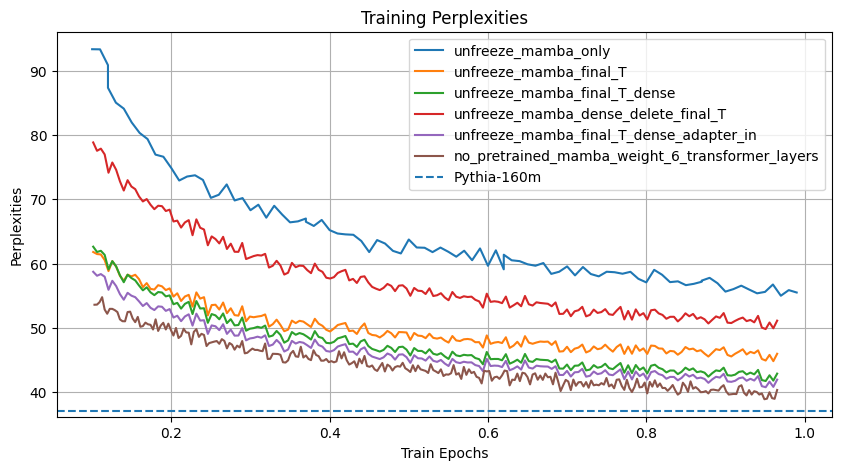

In [16]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

unfreeze_mamba_folder = '../20_23_2e-4'
unfreeze_mamba_final_T_folder = '../final_T_unfreezed_2e-4'
unfreeze_mamba_final_T_dense_folder = '../final_T_and_dense_unfreezed_2e-4'
unfreeze_mamba_dense_delete_T_folder = '../mamba_no_final_transformer_embedding_unfreezed'
connection_unfreeze_mamba_final_T_dense_folder = '../mamba_connection_and_everything_unfreezed'
no_pretrained_weight_6_transformers = '../no_pretrained_weight_6_transformer_layers_bs32'

folders = [unfreeze_mamba_folder, unfreeze_mamba_final_T_folder, unfreeze_mamba_final_T_dense_folder, unfreeze_mamba_dense_delete_T_folder, connection_unfreeze_mamba_final_T_dense_folder, no_pretrained_weight_6_transformers]
names = ['unfreeze_mamba_only', 'unfreeze_mamba_final_T', 'unfreeze_mamba_final_T_dense', 'unfreeze_mamba_dense_delete_final_T', 'unfreeze_mamba_final_T_dense_adapter_in', 'no_pretrained_mamba_weight_6_transformer_layers']
checkpoint = 'checkpoint-10000'

i = 0
plt.figure(figsize=(10, 5))  # Set the figure size (optional)
for i in range(len(folders)):
    root_folder = folders[i]
    model_name = names[i]
    if i == len(folders)-1:
        checkpoint= 'checkpoint-15000'
    json_path = os.path.join(root_folder, checkpoint, 'trainer_state.json')
    if os.path.exists(json_path):
        with open(json_path, 'r') as json_file:
            data = json.load(json_file)
            losses = []
            steps = []

            for t in data['log_history']:
                if t['epoch'] >= 0.1 and t['epoch'] < 1.0 and 'loss' in t:
                    losses.append((np.exp(t['loss'])))
                    steps.append(t['epoch'])
            plt.plot(steps, losses, label=model_name)  # Plot training losses

plt.axhline(37.07, linestyle='--', label='Pythia-160m')
plt.xlabel('Train Epochs')  # Label for the x-axis
plt.ylabel('Perplexities')  # Label for the y-axis
plt.title('Training Perplexities')  # Title of the plot
plt.legend()  # Add a legend to differentiate the lines
plt.grid(True)  # Add grid for better readability of the plot
plt.show()  # Display the plot

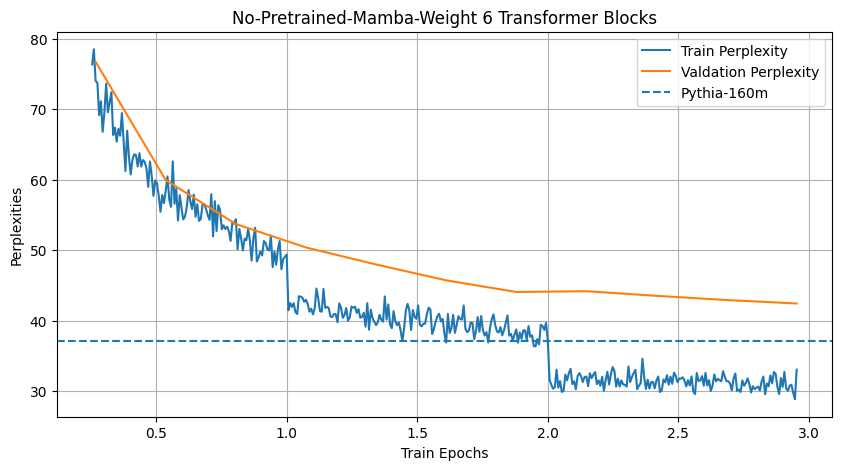

In [3]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

no_pretrained_weight_6_transformers = '../seq_len_1024_4_transformer_layers'

folders = [no_pretrained_weight_6_transformers]
names = ['no_pretrained_mamba_weight_6_transformer_layers']
checkpoint = 'checkpoint-22000'

i = 0
plt.figure(figsize=(10, 5))  # Set the figure size (optional)
for i in range(len(folders)):
    root_folder = folders[i]
    model_name = names[i]
    json_path = os.path.join(root_folder, checkpoint, 'trainer_state.json')
    if os.path.exists(json_path):
        with open(json_path, 'r') as json_file:
            data = json.load(json_file)
            train_losses = []
            train_steps = []
            eval_losses = []
            eval_steps = []

            for t in data['log_history']:
                if t['epoch'] >= 0.25 and 'loss' in t:
                    train_losses.append((np.exp(t['loss'])))
                    train_steps.append(t['epoch'])
                if t['epoch'] >= 0.25 and 'eval_loss' in t:
                    eval_losses.append((np.exp(t['eval_loss'])))
                    eval_steps.append(t['epoch'])
            plt.plot(train_steps, train_losses, label='Train Perplexity') 
            plt.plot(eval_steps, eval_losses, label='Valdation Perplexity')  # Plot training losses

plt.axhline(37.07, linestyle='--', label='Pythia-160m')
plt.xlabel('Train Epochs')  # Label for the x-axis
plt.ylabel('Perplexities')  # Label for the y-axis
plt.title('No-Pretrained-Mamba-Weight 6 Transformer Blocks')  # Title of the plot
plt.legend()  # Add a legend to differentiate the lines
plt.grid(True)  # Add grid for better readability of the plot
plt.show()  # Display the plot